<a href="https://colab.research.google.com/github/iritwikdas/support_resistance_breakout/blob/main/breakout_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
!pip install yfinance
!pip install mplfinance
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [135]:
def get_stock_price(symbol):
  df = yf.download(symbol, start='2021-02-01', threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df
symbol = '^NSEI'
df = get_stock_price(symbol)


[*********************100%***********************]  1 of 1 completed


In [136]:
df

,Date,Open,High,Low,Close
Date,,,,,
2021-02-01,737822.0,13758.599609,14336.349609,13661.750000,14281.200195
2021-02-02,737823.0,14481.099609,14731.700195,14469.150391,14647.849609
2021-02-03,737824.0,14754.900391,14868.849609,14574.150391,14789.950195
2021-02-04,737825.0,14789.049805,14913.700195,14714.750000,14895.650391
2021-02-05,737826.0,14952.599609,15014.650391,14864.750000,14924.250000
...,...,...,...,...,...
2021-10-08,738071.0,17886.849609,17941.849609,17840.349609,17895.199219
2021-10-11,738074.0,17867.550781,18041.949219,17839.099609,17945.949219
2021-10-12,738075.0,17915.800781,18008.650391,17864.949219,17991.949219


In [137]:
#Bullish Fractal

def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1]
  cond2 = df['Low'][i] < df['Low'][i+1]
  cond3 = df['Low'][i+1] < df['Low'][i+2]
  cond4 = df['Low'][i-1] < df['Low'][i-2]
  return(cond1 and cond2 and cond3 and cond4)

#Bearish Fractal

def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1]
  cond2 = df['High'][i] > df['High'][i+1]
  cond3 = df['High'][i+1] > df['High'][i+2]
  cond4 = df['High'][i-1] > df['High'][i-2]
  return(cond1 and cond2 and cond3 and cond4)

In [138]:
def is_far_from_level(value, levels, df):
  ave = np.mean(df['High']-df['Low'])
  return np.sum([abs(value-level)<ave for _, level in levels]) == 0

In [139]:
levels = []

for i in range(2,df.shape[0]-2):
  if is_support(df,i):
    low = df['Low'][i]
    if is_far_from_level(low, levels, df):
      levels.append((i,low))
  elif is_resistance(df,i):
    high = df['High'][i]
    if is_far_from_level(high, levels, df):
      levels.append((i,high))

In [140]:
df

,Date,Open,High,Low,Close
Date,,,,,
2021-02-01,737822.0,13758.599609,14336.349609,13661.750000,14281.200195
2021-02-02,737823.0,14481.099609,14731.700195,14469.150391,14647.849609
2021-02-03,737824.0,14754.900391,14868.849609,14574.150391,14789.950195
2021-02-04,737825.0,14789.049805,14913.700195,14714.750000,14895.650391
2021-02-05,737826.0,14952.599609,15014.650391,14864.750000,14924.250000
...,...,...,...,...,...
2021-10-08,738071.0,17886.849609,17941.849609,17840.349609,17895.199219
2021-10-11,738074.0,17867.550781,18041.949219,17839.099609,17945.949219
2021-10-12,738075.0,17915.800781,18008.650391,17864.949219,17991.949219


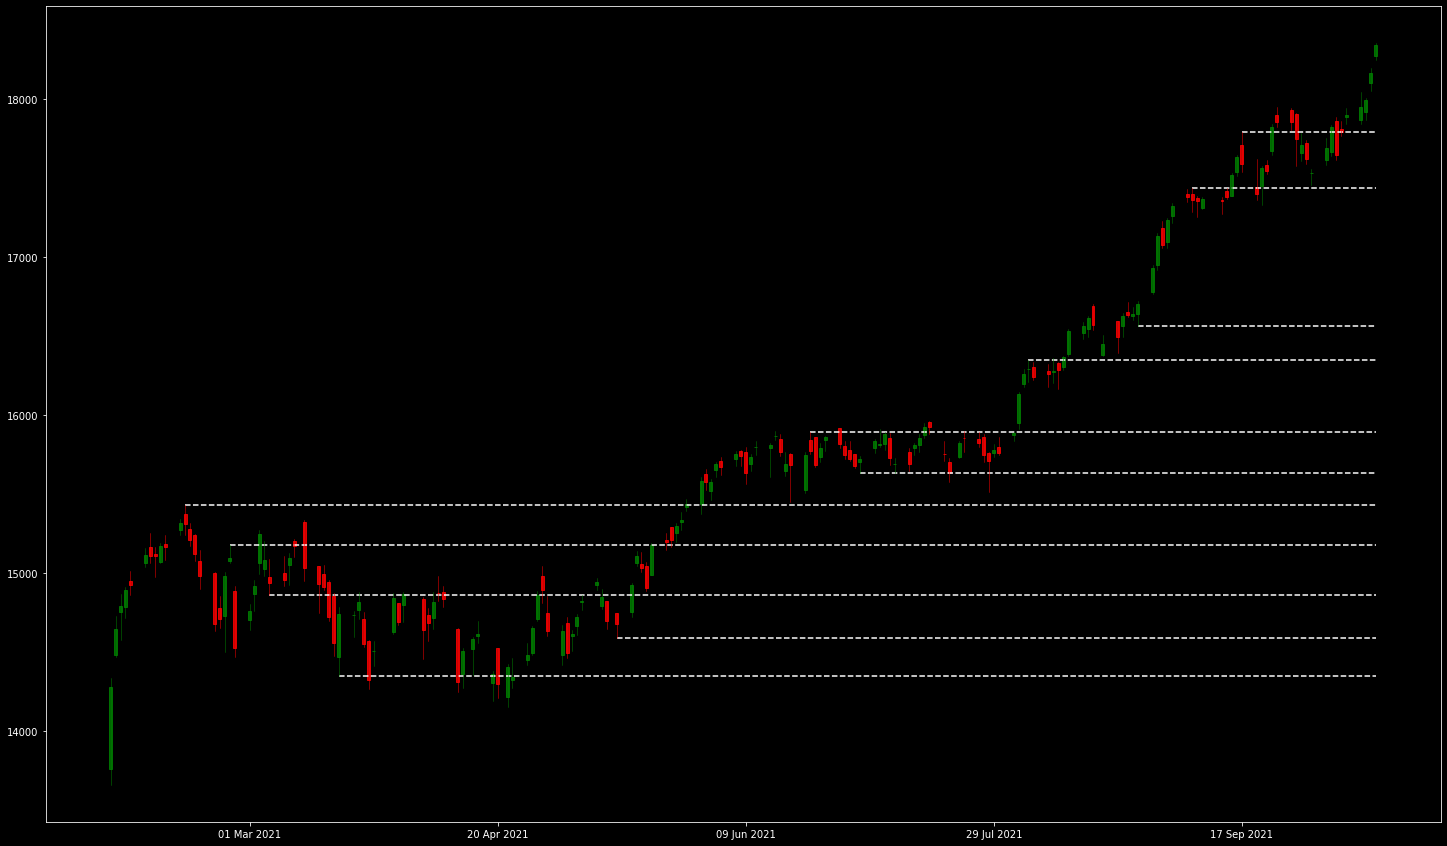

In [145]:
# for visualization

plt.style.use('dark_background')
ax.grid(True)
fig, ax = plt.subplots(figsize=(25, 15))   
candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)    
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)  

for level in levels:        
  plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors='white', linestyle='--') 
   
fig.show()